In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.io import imread, imshow
from scipy.ndimage.filters import convolve

In [8]:
image1 = imread("images/profile.jpg")
image2 = imread("images/profile2.jpg")

## Displaying an Image

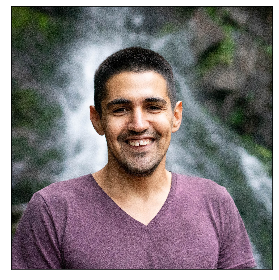

In [45]:
def show_image(image, cmap = "viridis"):
    plt.xticks([])
    plt.yticks([])
    imshow(image, cmap = cmap)
    plt.show()
show_image(image2)

## RGB Image Channels

In [43]:
image1_red = image1[:, :, 0]
image1_green = image1[:, :, 1]
image1_blue = image1[:, :, 2]

image2_red = image2[:, :, 0]
image2_green = image2[:, :, 1]
image2_blue = image2[:, :, 2]

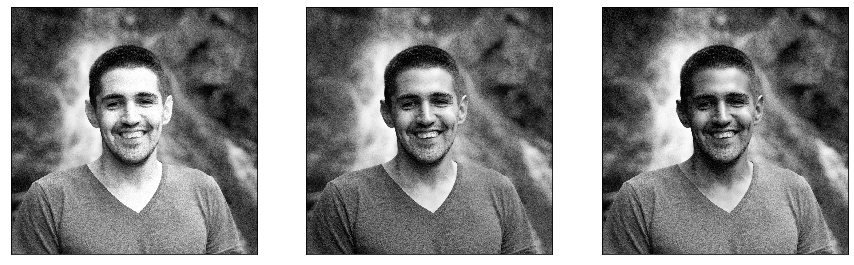

In [89]:
fig, axes = plt.subplots(1, 3, figsize = (15, 15))
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
axes[0].imshow(image2_red, cmap = "gray")
axes[1].imshow(image2_green, cmap = "gray")
axes[2].imshow(image2_blue, cmap = "gray")
plt.show()

## Color Histogram of an Image

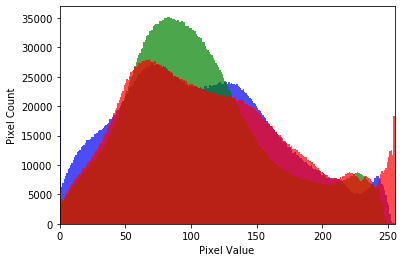

In [90]:
plt.hist(image2_blue.ravel(), bins = 256, color = "blue", alpha = 0.7)
plt.hist(image2_green.ravel(), bins = 256, color = "green", alpha = 0.7)
plt.hist(image2_red.ravel(), bins = 256, color = "red", alpha = 0.7)

plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")

plt.xlim(0, 255)
plt.show()

## Converting image to grayscale

In [94]:
gray_image = image2.mean(axis = 2).astype(np.uint8)

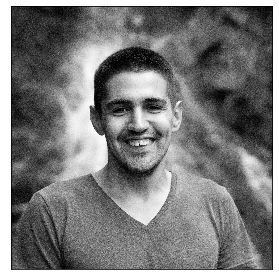

In [95]:
show_image(gray_image, "gray")

### Gamma Corected Image

In [98]:
image_gamma_corected = (0.299 * image2_red + 0.587 * image2_green + 0.114 * image2_blue).astype(np.uint8)

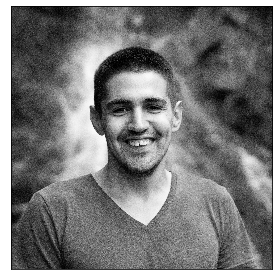

In [99]:
show_image(image_gamma_corected, "gray")

## Convolutions

Applying kernel (filter) to an image as summing the multiplication values element-wise (Hadamard product).

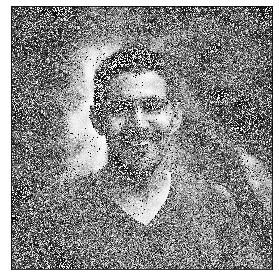

In [153]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
sharp_image = convolve(image_gamma_corected, kernel)
show_image(sharp_image, "gray")

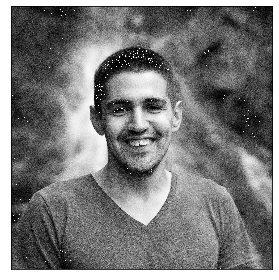

In [151]:
kernel = np.array([
    [0, -0.1, 0],
    [-0.1, 1.4, -0.1],
    [0, -0.1, 0]
])
sharp_image = convolve(image_gamma_corected, kernel)
show_image(sharp_image, "gray")

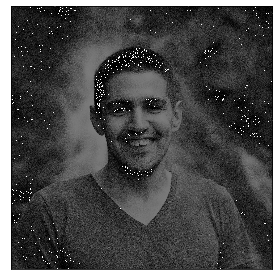

In [152]:
kernel = np.array([
    [0, -1, 0],
    [-1, 8, -1],
    [0, -1, 0]
])
kernel = kernel / 8
sharp_image = convolve(image_gamma_corected, kernel)
show_image(sharp_image, "gray")

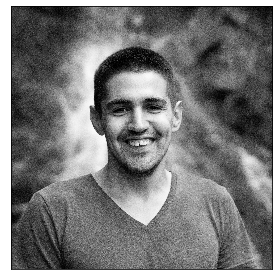

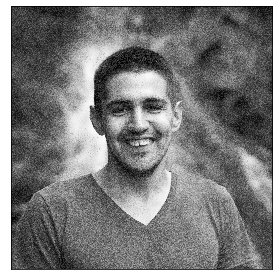

In [157]:
combined_image = (image_gamma_corected * 0.8 + sharp_image * 0.2).astype(np.uint8)
show_image(image_gamma_corected, "gray")
show_image(combined_image, "gray")

## Thresholding

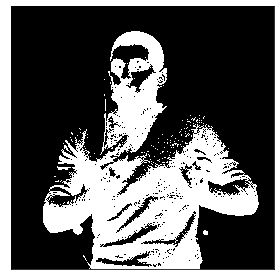

In [180]:
def treshold_image(image, threshold):
    is_smaller = image >= threshold
    thresholded_image = image.copy()
    thresholded_image[is_smaller] = 0
    thresholded_image[~is_smaller] = 255
    return thresholded_image
    
tr_img = treshold_image(image1_green, 160)
show_image(tr_img, cmap="gray")

## Image Morphology

Useful for **Image Segmentation**

Operations - Dilation, erosion, opening, closing

https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm

Methodology
- Choose a structuring element (e.g. 2x2 square or cross)
- Move the element around the image
- Apply an operation
